In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The features 'glucose','blood pressure', 'insulin' and 'BMI' all have a minimum value of 0.This is illogical becuase these values can't be zero .Therefore ,in our circumstance,this can be safely referred to as 'missing data'. The 0 valued rows must either be removed or replaced with mean or median value for that feature.

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

no null values

## **Data visualization**

In this section ,we will start visualising the features of the dataset one by one.Firstly Univariate feature visualization will be done,then we will move onto Multivariate feature visualization

**Univariate Analysis**

Analysis of Pregnancies
As observed, Pregnancies is a Quantitative feature. There are many plots to analyse these type of data. Histograms, Box plots and Violin plots, are useful to know how the data is distributed

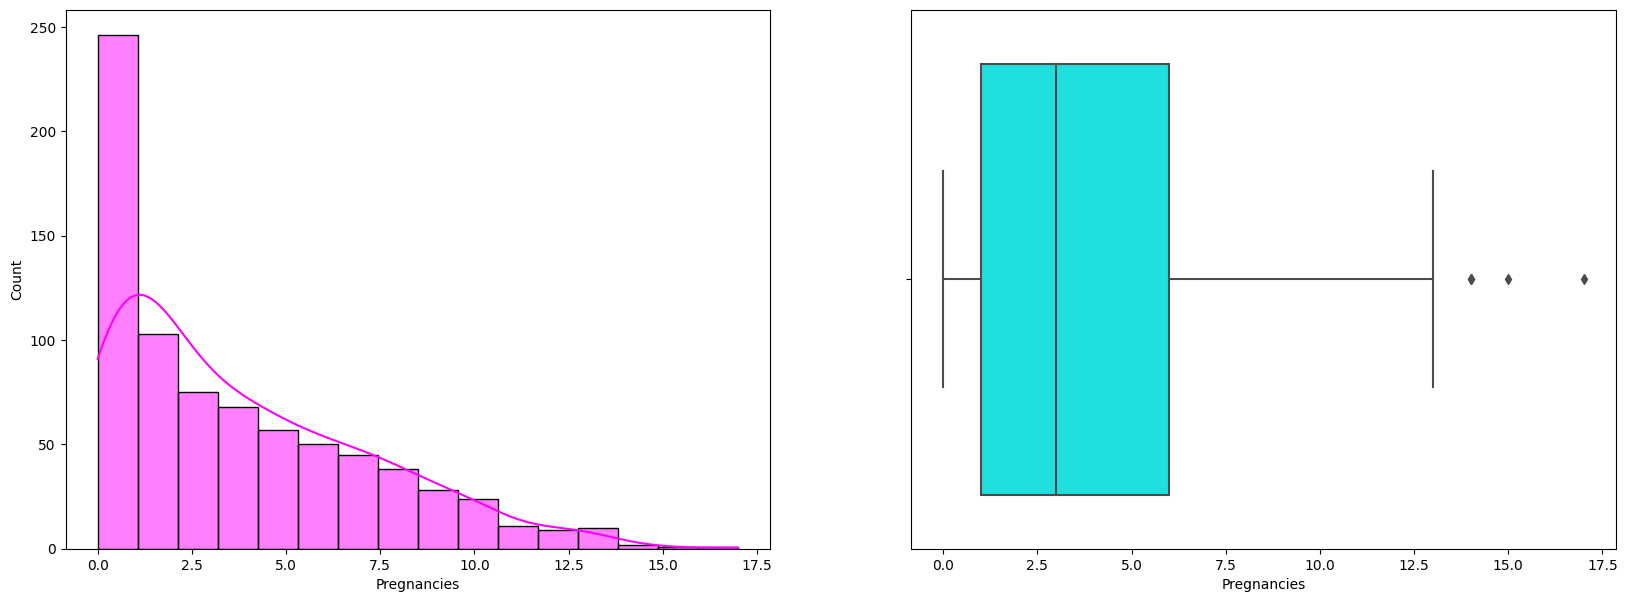

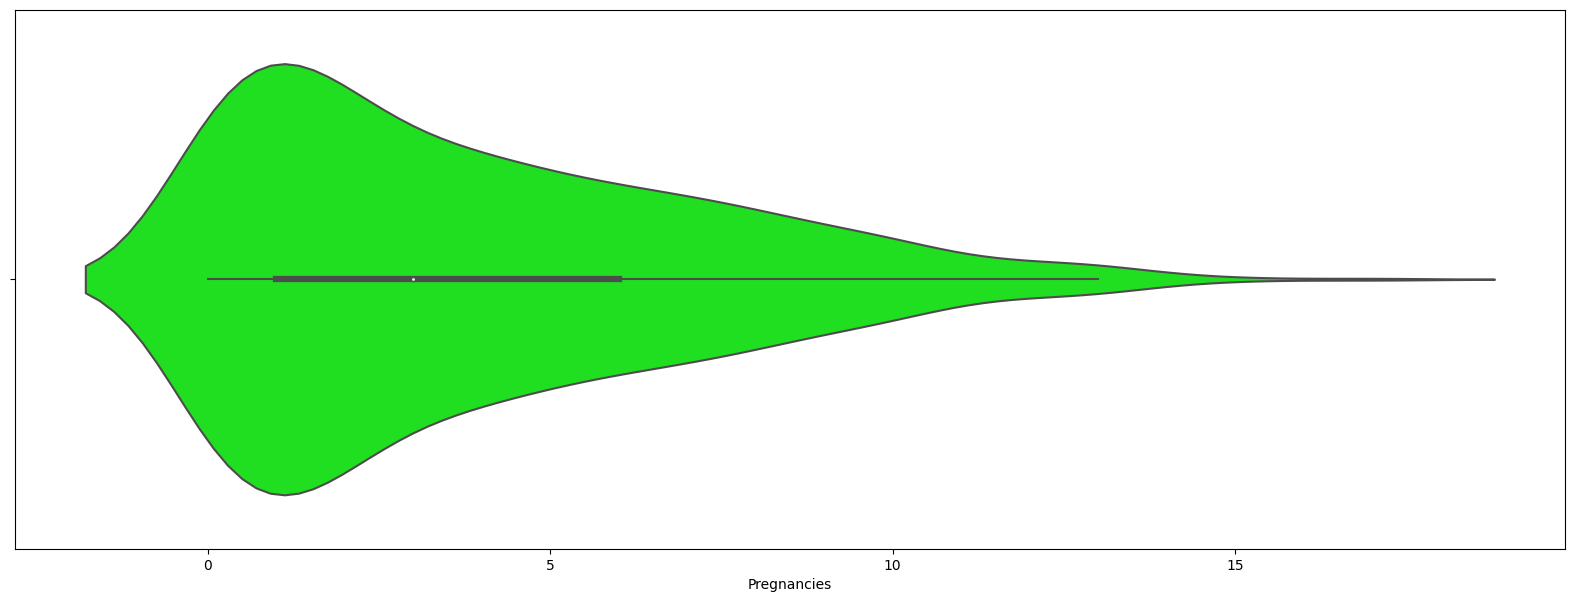

In [5]:
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))
fig2, ax2 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Pregnancies", kde=True, ax=ax1[0],color = 'magenta')
sns.boxplot(data=df, x="Pregnancies", ax=ax1[1],color = 'aqua')

sns.violinplot(data=df, x="Pregnancies", ax=ax2,color = 'lime')

plt.show()

In [6]:
print("Median of Pregnancies: ", df["Pregnancies"].median())
print("Maximum of Pregnancies: ", df["Pregnancies"].max())

Median of Pregnancies:  3.0
Maximum of Pregnancies:  17


In [7]:
df["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

From the above analysis we observe that:

Most patients had 0, 1 or 2 pregnancies.
Median value of Pregnancies is 3.
Also, patients had upto 17 pregnancies!
There are 3 outliers on the boxplot. But, let's not remove them for now.

**Analysis of Outcome (Target Variable)**

A Count plot and a Pie chart will be two useful plots to analyse the Outcome column as it is a categorical feature. Usefulness in the sense, both the plots will allow us to observe the distribution of each category in the feature.

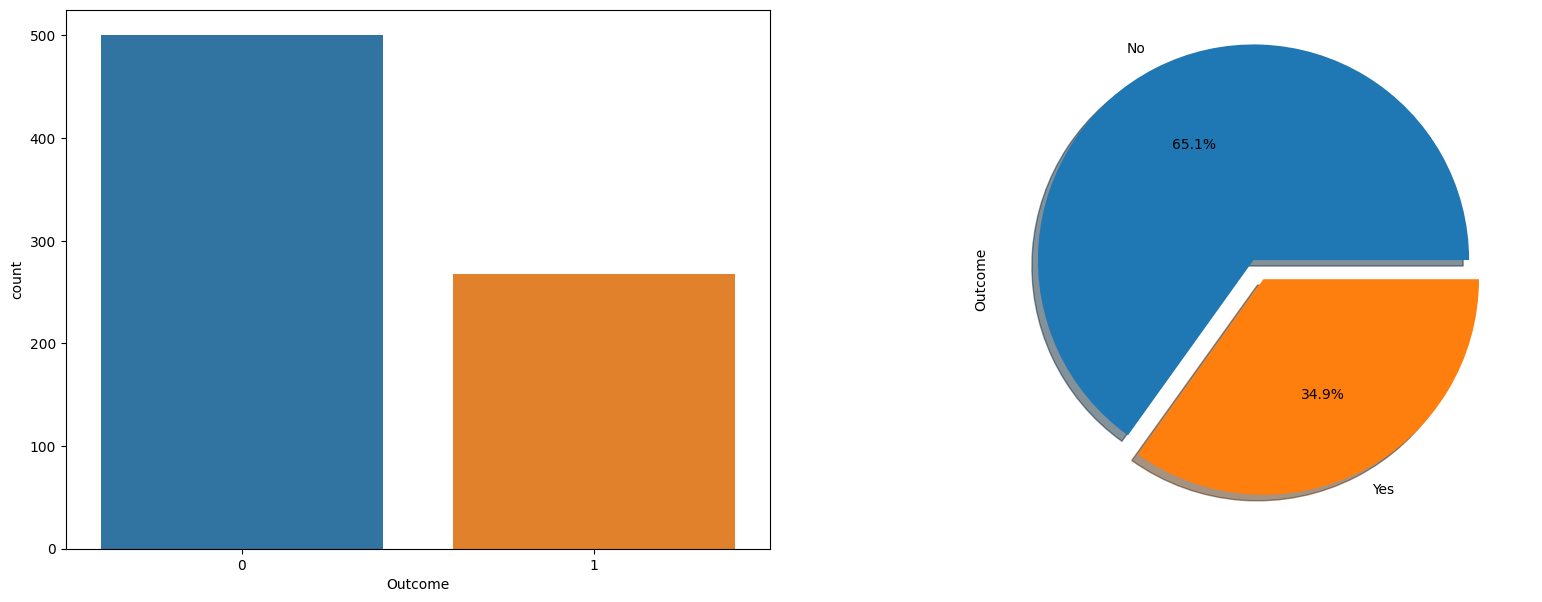

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=df, x="Outcome", ax=ax[0])
df["Outcome"].value_counts().plot.pie(explode=[0.1, 0],autopct="%1.1f%%", labels=["No", "Yes"], shadow=True, ax=ax[1])

plt.show()

We observe from the above plot that:

*   65.1% patients in the dataset do NOT have diabetes.
*   34.9% patients in the dataset has diabetes.





**Analysis of Glucose**

Glucose is a Quantitative feature. Histograms, Box plots and Violin plots, are useful to know how the data is distributed.

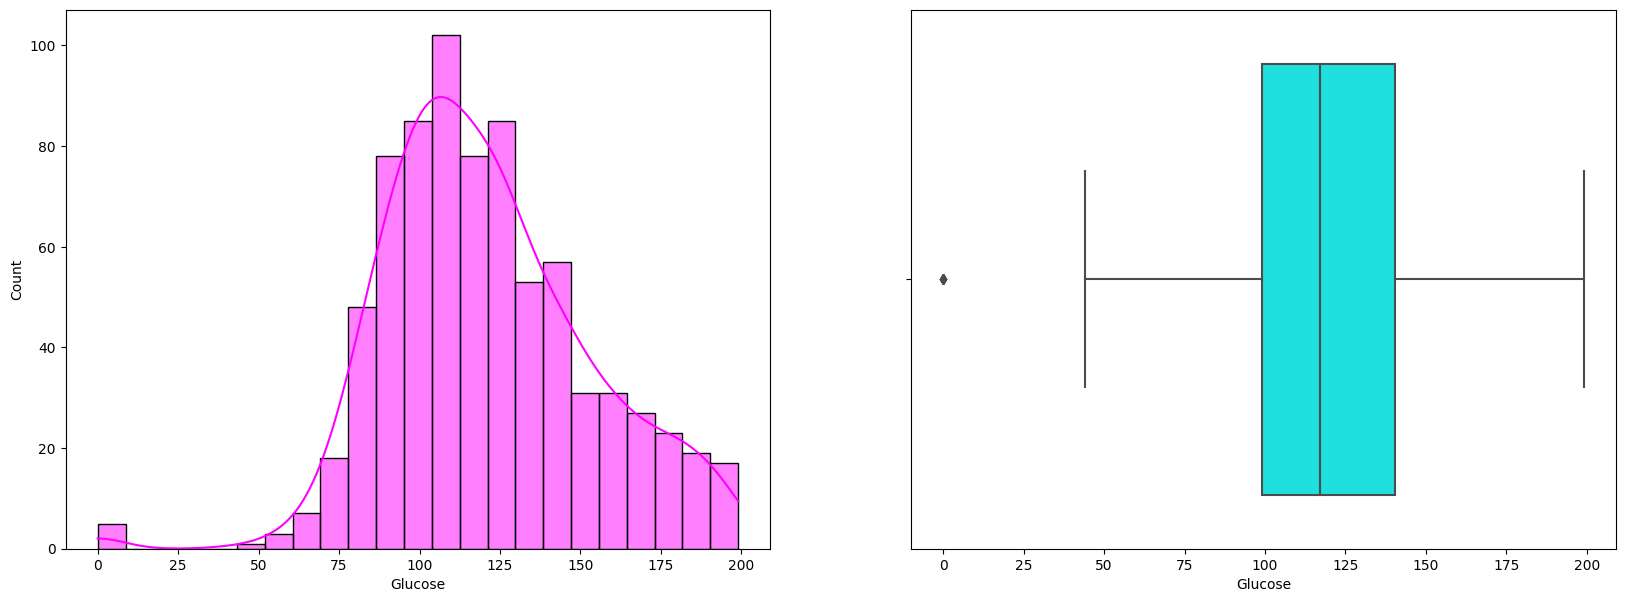

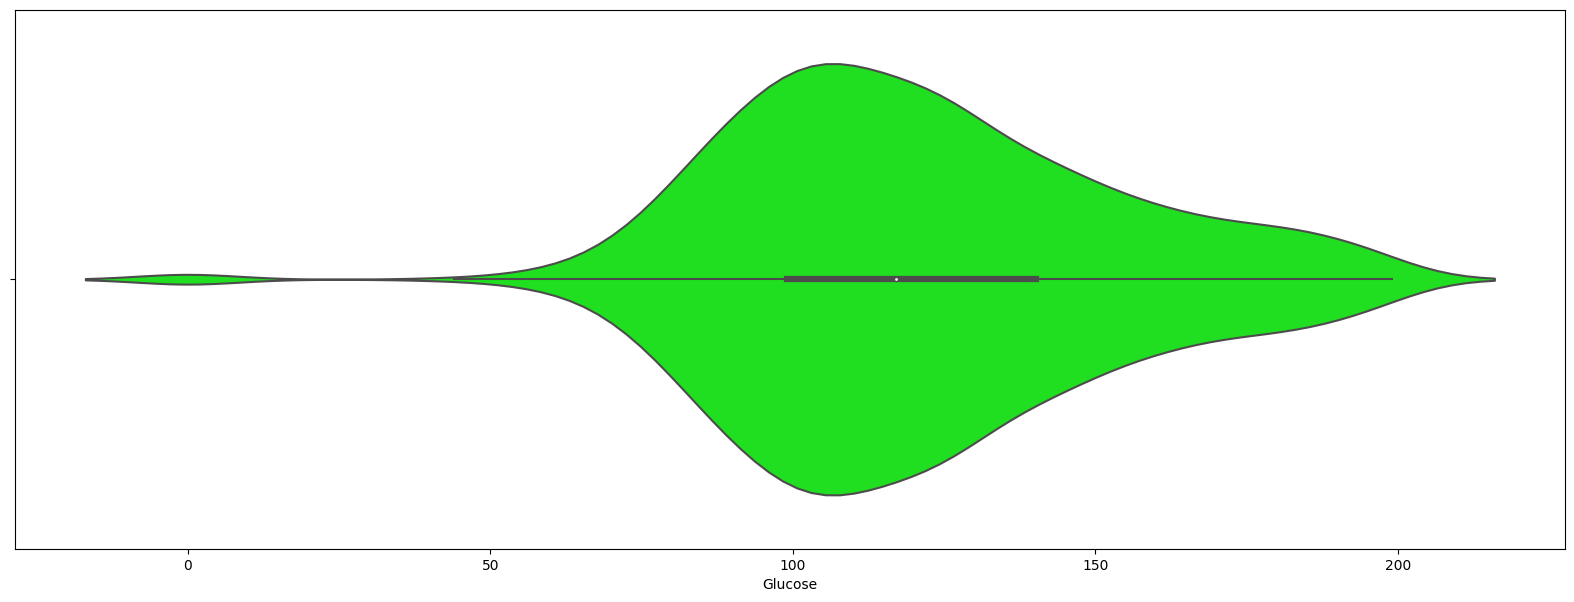

In [9]:
fig3, ax3 = plt.subplots(1, 2, figsize=(20, 7))
fig4, ax4 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Glucose", kde=True, ax=ax3[0], color = 'magenta')
sns.boxplot(data=df, x="Glucose", ax=ax3[1], color = 'aqua')

sns.violinplot(data=df, x="Glucose", ax=ax4, color = 'lime')

plt.show()

In [10]:
print("Median of Glucose: ", df["Glucose"].median())
print("Maximum of Glucose: ", df["Glucose"].max())
print("Mean of Glucose: ", df["Glucose"].mean())

Median of Glucose:  117.0
Maximum of Glucose:  199
Mean of Glucose:  120.89453125


In [11]:
print("Rows with Glucose value of 0: ", df[df["Glucose"] == 0].shape[0])

Rows with Glucose value of 0:  5


We observe that:

*   Median (117.0) and mean (120.8) of Glucose lie very close to each other i.e. the distribution is more or less symmetric and uniform.
*   As seen from the box plot, an outlier lies on 0-value, which I talked about earlier.
*   There are 5 rows with Glucose value as 0. This is not logical, so we need to keep this in mind.

**Analysis of Blood Pressure**

BloodPressure is a Quantitative feature. Histograms, Box plots and Violin plots, are useful to know how the data is distributed.

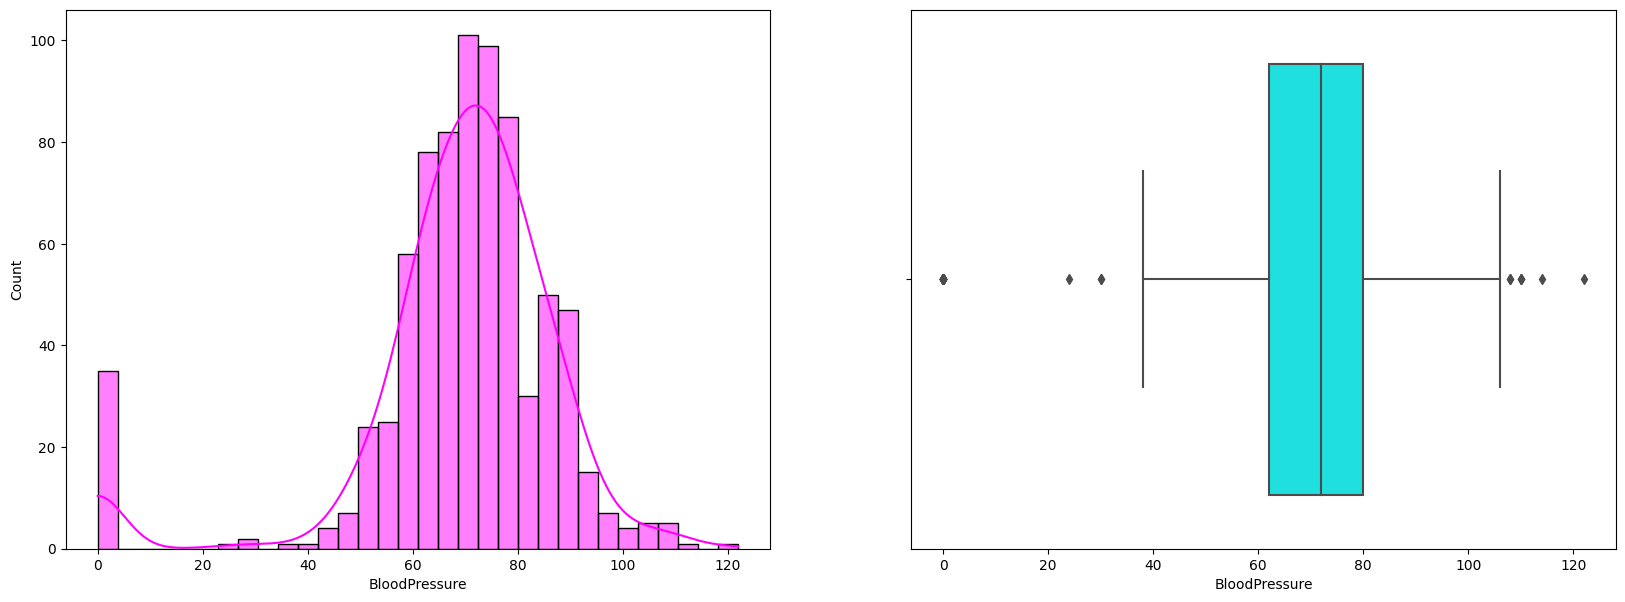

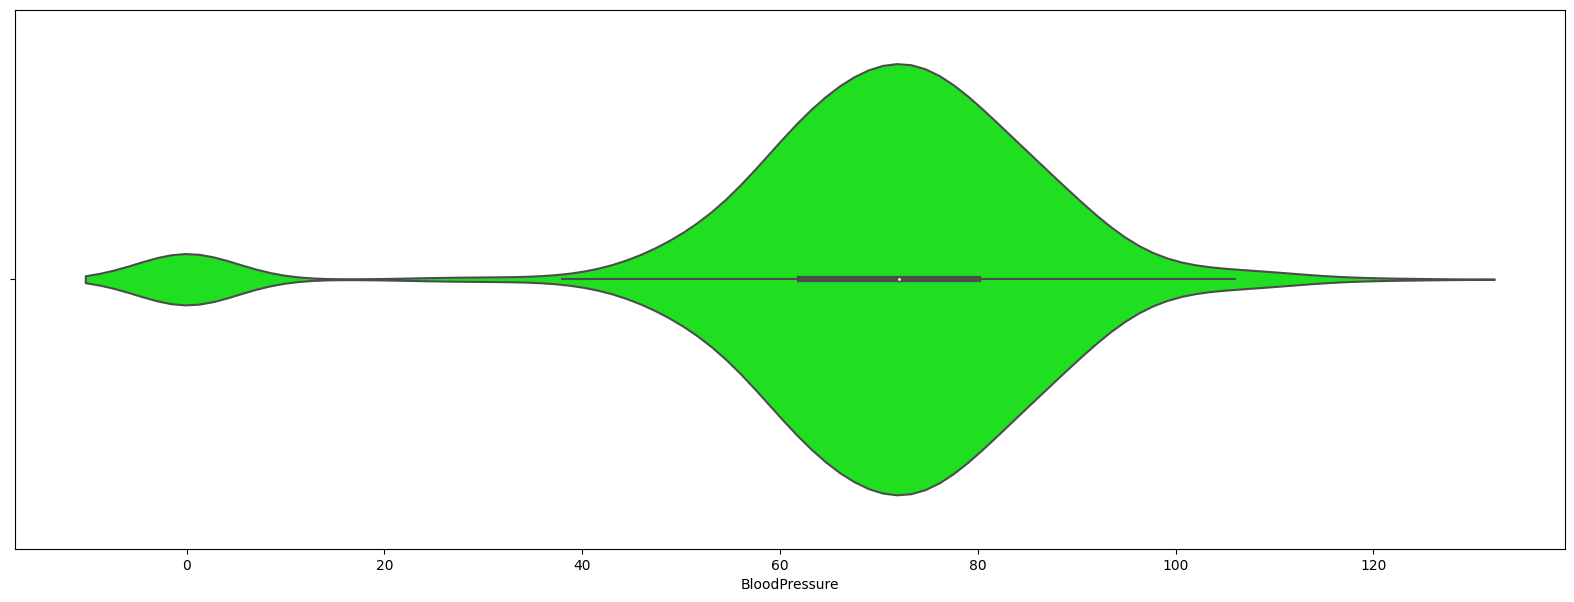

In [12]:
fig5, ax5 = plt.subplots(1, 2, figsize=(20, 7))
fig6, ax6 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="BloodPressure",kde=True,  ax=ax5[0],color = 'magenta')
sns.boxplot(data=df, x="BloodPressure", ax=ax5[1], color = 'aqua')

sns.violinplot(data=df, x="BloodPressure", ax=ax6, color = 'lime')

plt.show()

In [13]:
print("Median of Blood Pressure: ", df["BloodPressure"].median())
print("Maximum of Blood Pressure: ", df["BloodPressure"].max())
print("Mean of Pressure: ", df["BloodPressure"].mean())

Median of Blood Pressure:  72.0
Maximum of Blood Pressure:  122
Mean of Pressure:  69.10546875


In [15]:
print("Rows with BloodPressure value of 0: ", df[df["BloodPressure"] == 0].shape[0])

Rows with BloodPressure value of 0:  35


We observe that:​

*   Median (72.0) and mean (69.1) of BloodPressure lie very close to each other i.e. the distribution is more or less symmetric and uniform.
*   As seen from the box plot and violin plot, some outliers lie on 0-value, which I talked about earlier.
*   There are 35 rows with BloodPressure value as 0. This is not logical.

**Analysis of Insulin**

Plotting Histogram, Box plot and Violin plot for Insulin

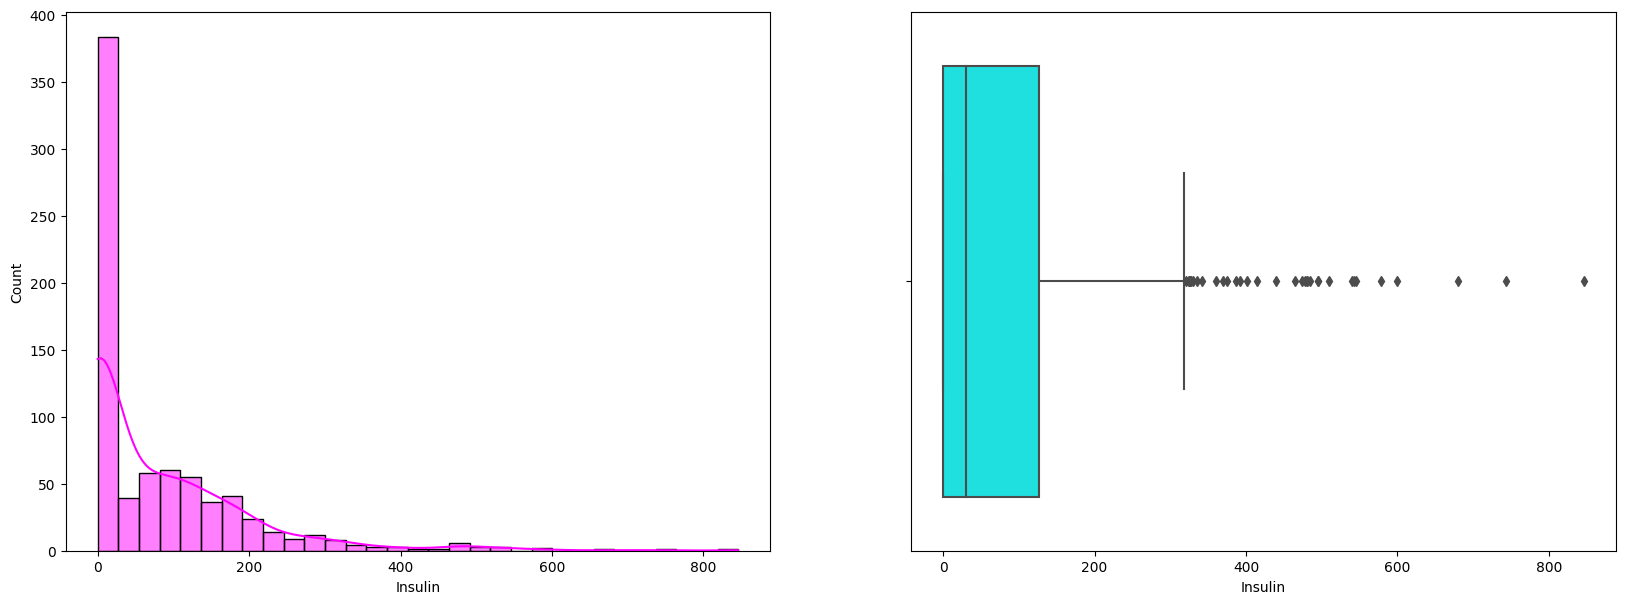

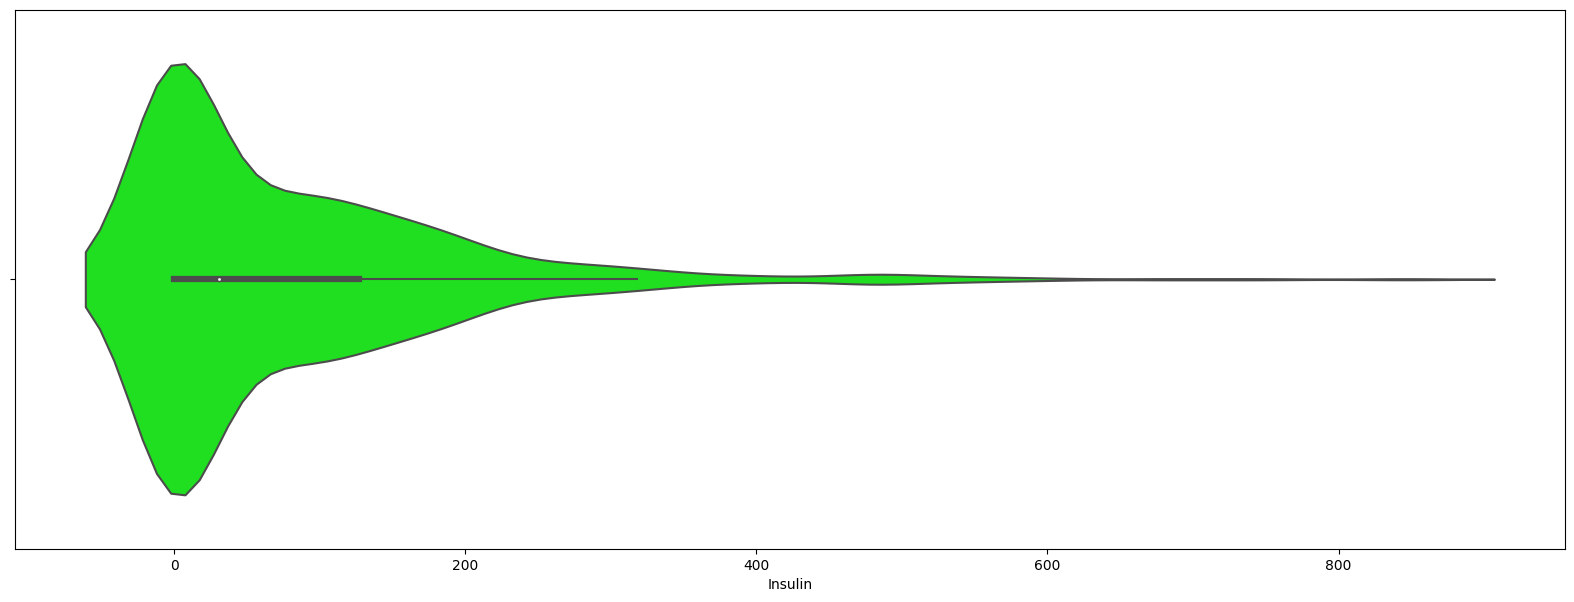

In [16]:
fig7, ax7 = plt.subplots(1, 2, figsize=(20, 7))
fig8, ax8 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="Insulin", kde=True, ax=ax7[0],color = 'magenta')
sns.boxplot(data=df, x="Insulin", ax=ax7[1],color = 'aqua')

sns.violinplot(data=df, x="Insulin", ax=ax8,color = 'lime')

plt.show()

In [17]:
print("Rows with Insulin value of 0: ", df[df["Insulin"] == 0].shape[0])

Rows with Insulin value of 0:  374


The plots for Insulin are highly skewed. Also, the 0-value logical error is the most for this feature. 374 out of 768 instances have value of Insulin as 0.

**Analysis of BMI**

Plotting Histogram, Box plot and Violin plot for BMI.

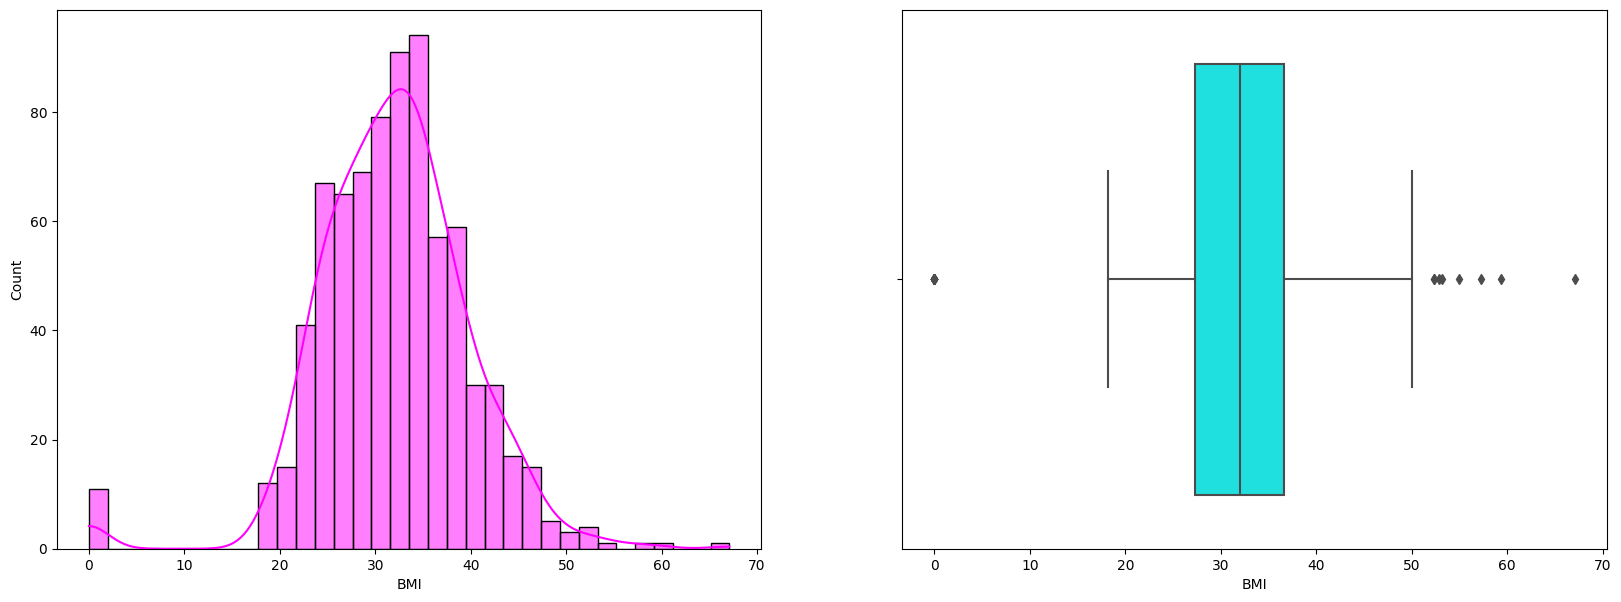

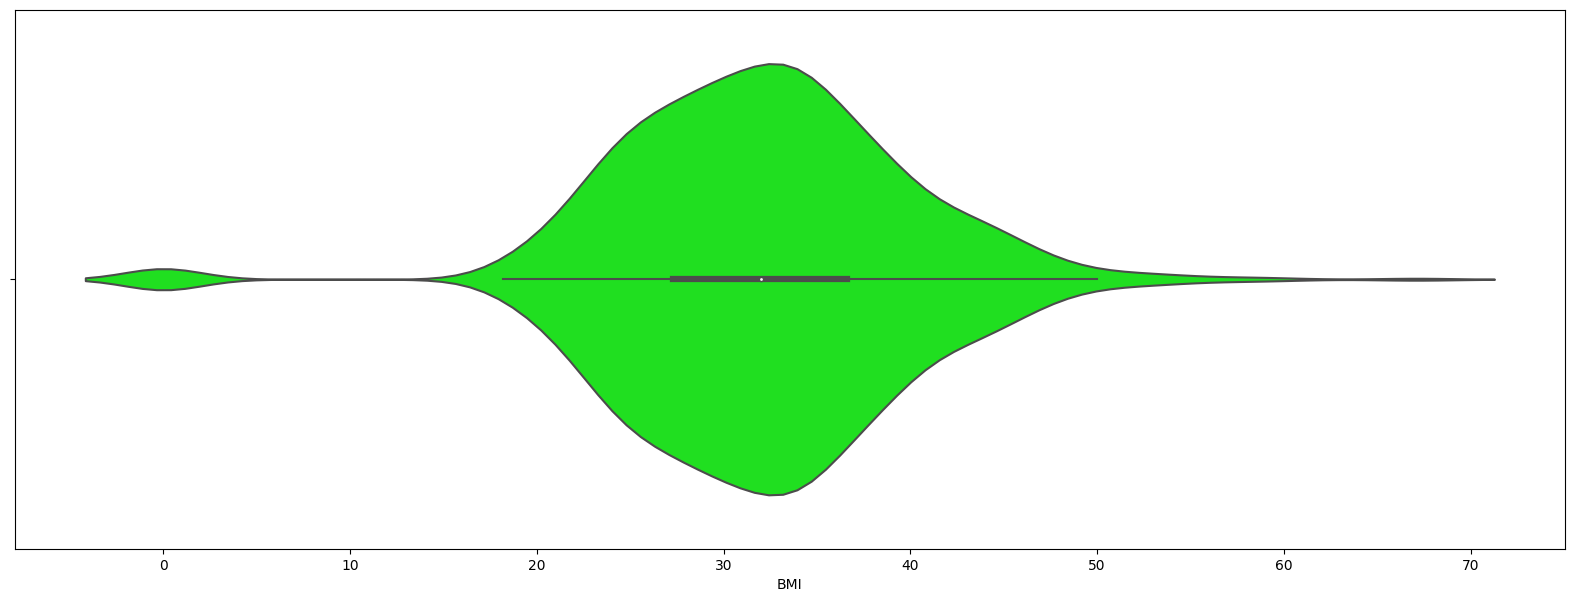

In [18]:
fig9, ax9 = plt.subplots(1, 2, figsize=(20, 7))
fig10, ax10 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="BMI", kde=True, ax=ax9[0], color = 'magenta')
sns.boxplot(data=df, x="BMI", ax=ax9[1], color = 'aqua')

sns.violinplot(data=df, x="BMI", ax=ax10 , color = 'lime')

plt.show()

In [19]:
print("Median of BMI: ", df["BMI"].median())
print("Maximum of BMI: ", df["BMI"].max())
print("Mean of BMI: ", df["BMI"].mean())

Median of BMI:  32.0
Maximum of BMI:  67.1
Mean of BMI:  31.992578124999998


In [20]:
print("Rows with BMI value of 0: ", df[df["BMI"] == 0].shape[0])

Rows with BMI value of 0:  11


We observe that:

*   Median (32.0) and Mean (31.9) of BMI are very close to each other. Thus, the distribution is more or less symmetric and uniform
*   Maximum BMI is 67.1
*   There are 11 rows with BMI value as 0

**Analysis of Diabetes Pedigree Function**

DiabetesPedigreeFunction is a continuous and quantitative variable.

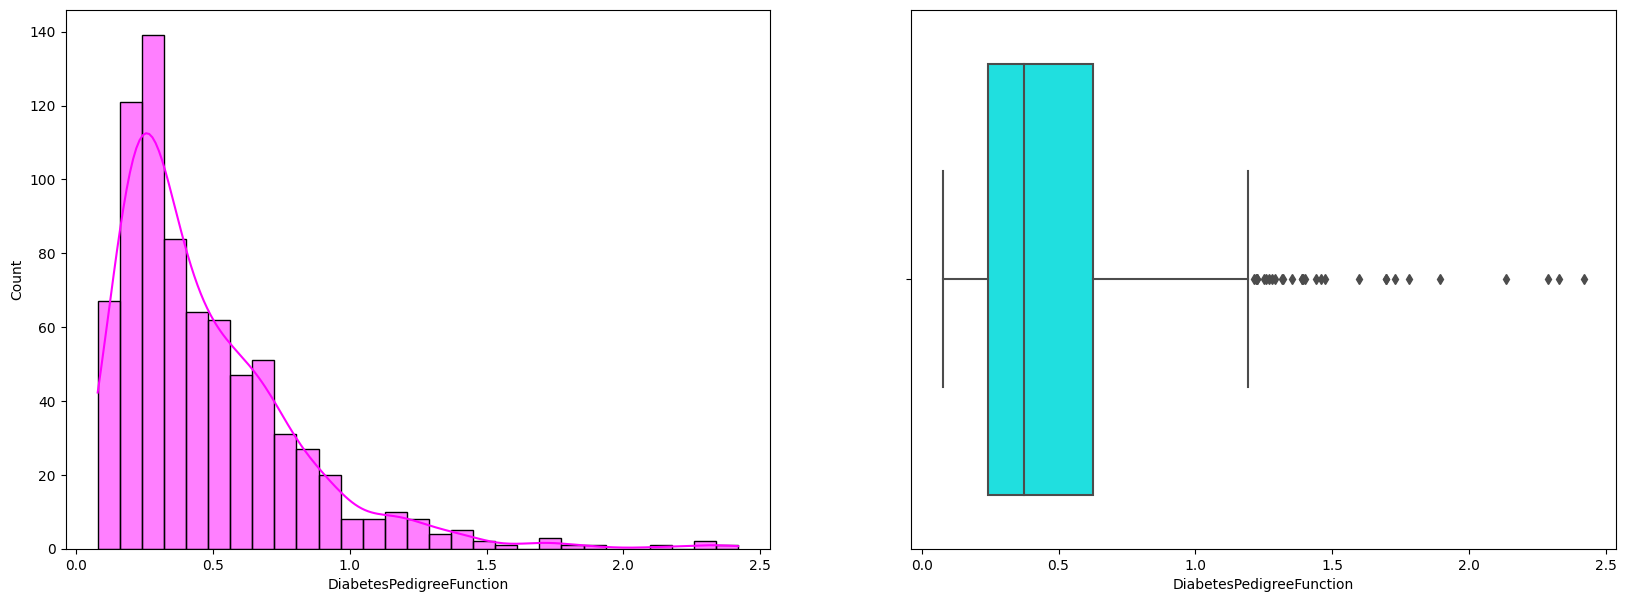

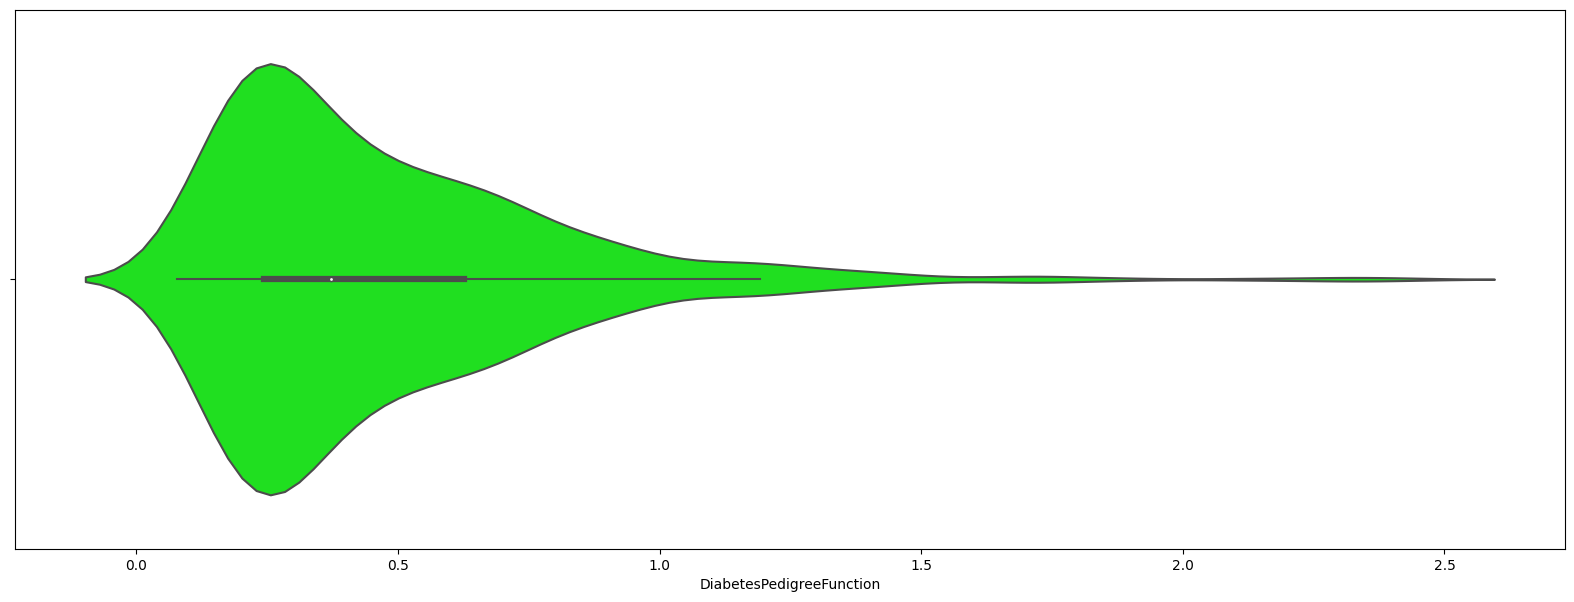

In [21]:
fig11, ax11 = plt.subplots(1, 2, figsize=(20, 7))
fig12, ax12 = plt.subplots(figsize=(20, 7))

sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, ax=ax11[0],color = 'magenta')
sns.boxplot(data=df, x="DiabetesPedigreeFunction", ax=ax11[1],color = 'aqua')

sns.violinplot(data=df, x="DiabetesPedigreeFunction", ax=ax12,color = 'lime')

plt.show()

In [22]:
print("Median of DiabetesPedigreeFunction: ", df["DiabetesPedigreeFunction"].median())
print("Maximum of DiabetesPedigreeFunction: ", df["DiabetesPedigreeFunction"].max())
print("Mean of DiabetesPedigreeFunction: ", df["DiabetesPedigreeFunction"].mean())

Median of DiabetesPedigreeFunction:  0.3725
Maximum of DiabetesPedigreeFunction:  2.42
Mean of DiabetesPedigreeFunction:  0.47187630208333325


We again observe that:

*   The distribution of Age is skewed on the left side.
*   There are some outliers in the Box plot for Age.

# **Multivariate Analysis**





**Analysis of Glucose and Outcome**

Since Glucose is a continuous feature, we plot a histogram with its hue based on Outcome.

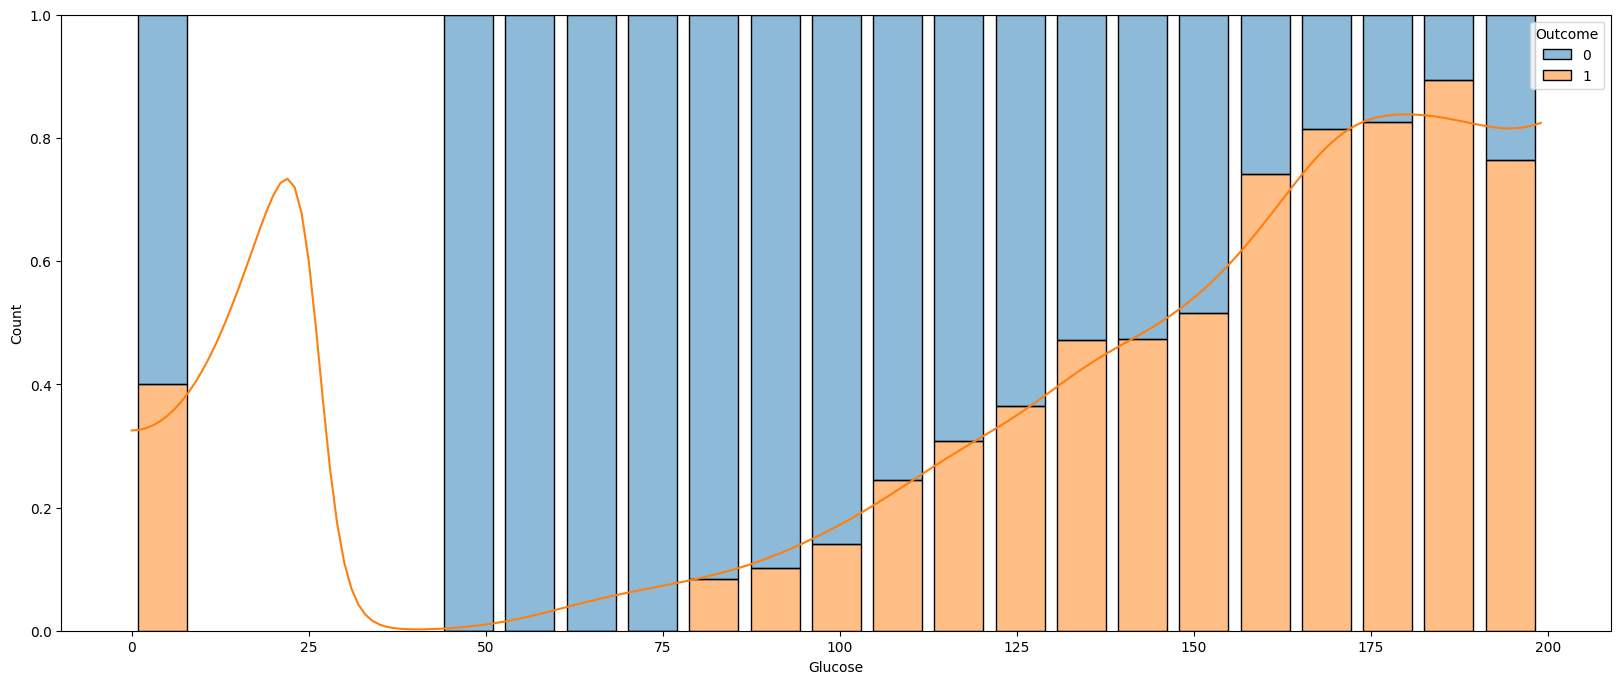

In [23]:
fig15, ax15 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="Glucose", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax15)
plt.show()

From the above plot, we see a positive linear correlation.

*   As the value of Glucose increases, the count of patients having diabetes increases i.e. value of Outcome as 1, increases.
*   Also, after the Glucose value of 125, there is a steady increase in the number of patients having Outcome of 1.
*   Note, when Glucose value is 0, it means the measurement is missing. We need to fill that values with the mean or median and then it will make sense.
So, there is a significant amount of positive linear correlation.



**Analysis of BloodPressure and Outcome**

BloodPressure is continuous and Outcome is binary feature. So, plotting a histogram for BloodPressure with its hue based on Outcome

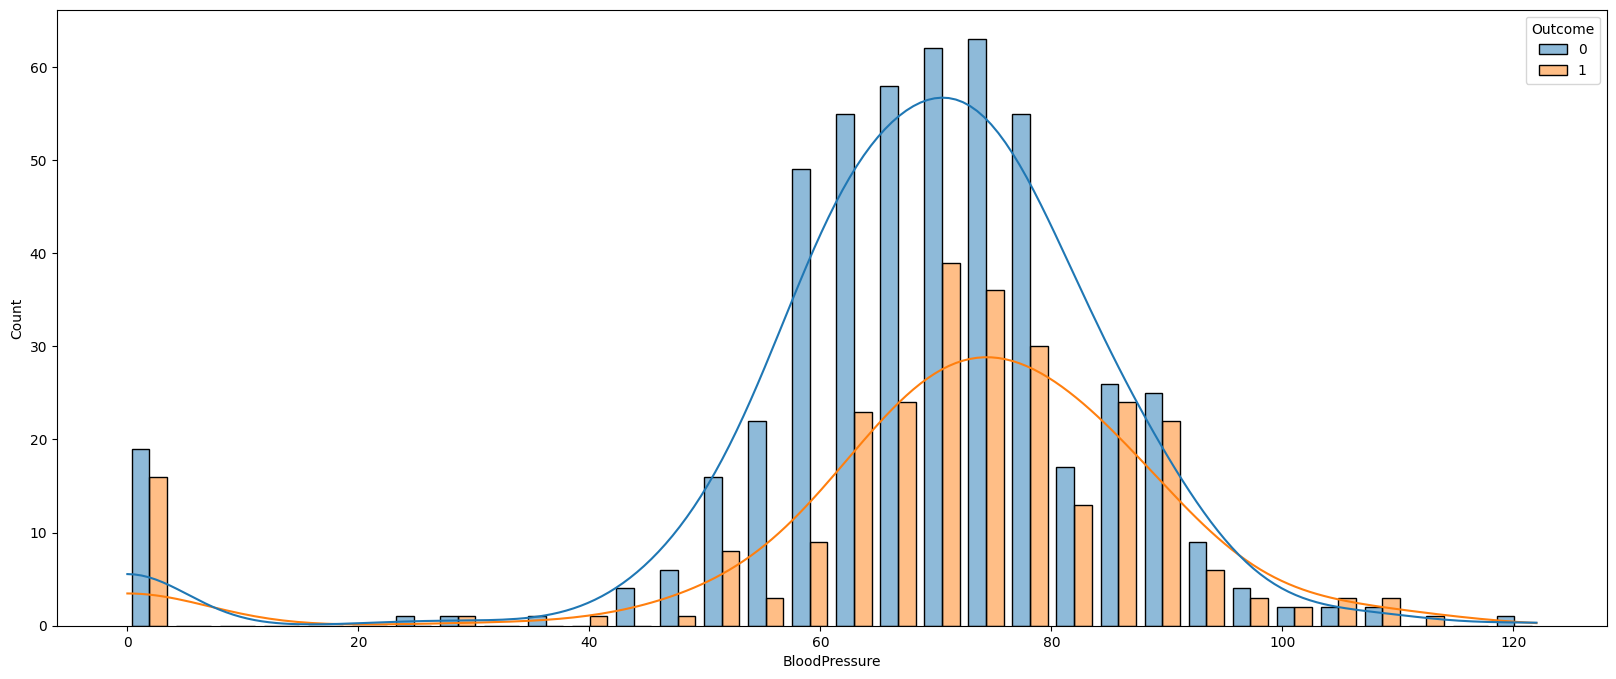

In [24]:
fig16, ax16 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="BloodPressure", hue="Outcome", shrink=0.8, multiple="dodge", kde=True, ax=ax16,)
plt.show()

We observe that, Outcome and BloodPressure do NOT have a positive or negative linear correlation. The value of Outcome do not increase linearly as value of BloodPressure increases.

However, for BloodPressure values greater than 82, count of patients with Outcome as 1, is more.

**Analysis of BMI and** **Outcome**

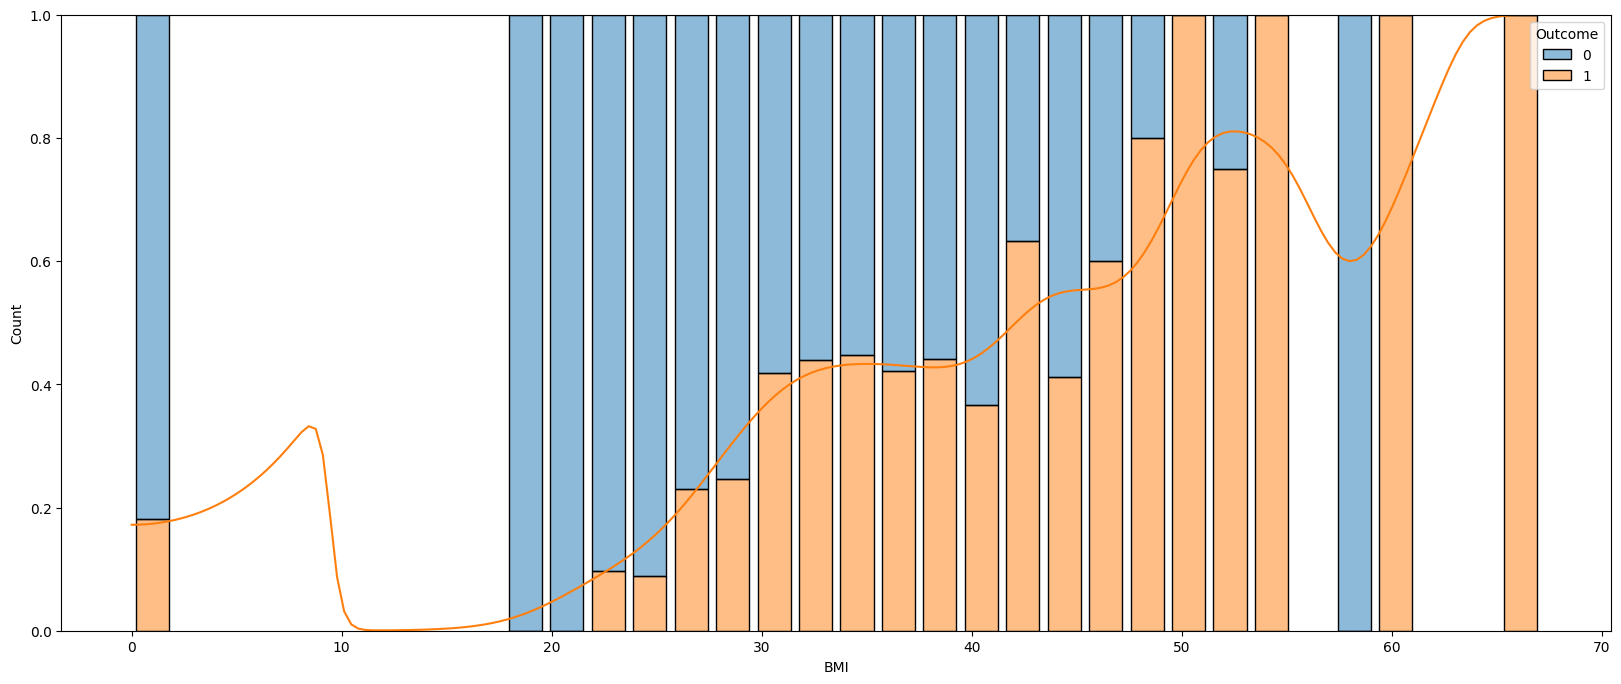

In [25]:
fig17, ax17 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="BMI", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax17)
plt.show()

From the above plot, a positive linear correlation is evident for BMI.

**Analysis of Age and Outcome**

Age is continuous so plotting a histogram with hue based on Outcome.

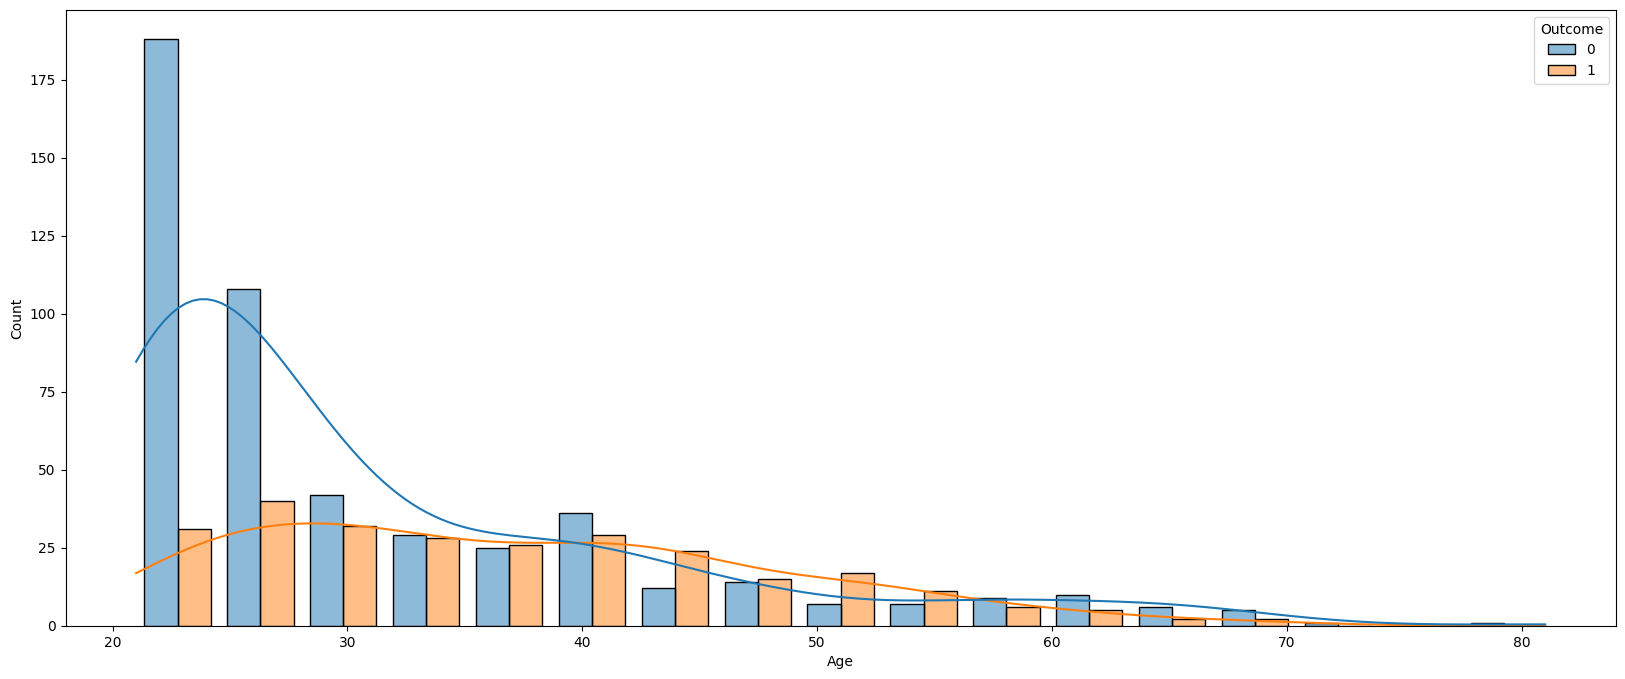

In [26]:
fig18, ax18 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="Age", hue="Outcome", shrink=0.8, multiple="dodge", kde=True, ax=ax18)
plt.show()

For Age greater than 35 years, the chances of patients having diabetes increases as evident from the plot i.e. The number of patients having diabetes is more than the number of people NOT having diabetes. But, it does not hold true for ages like 60+, somehow.

There is some positive linear correlation though.

**Analysis of Pregnancies and Outcome**

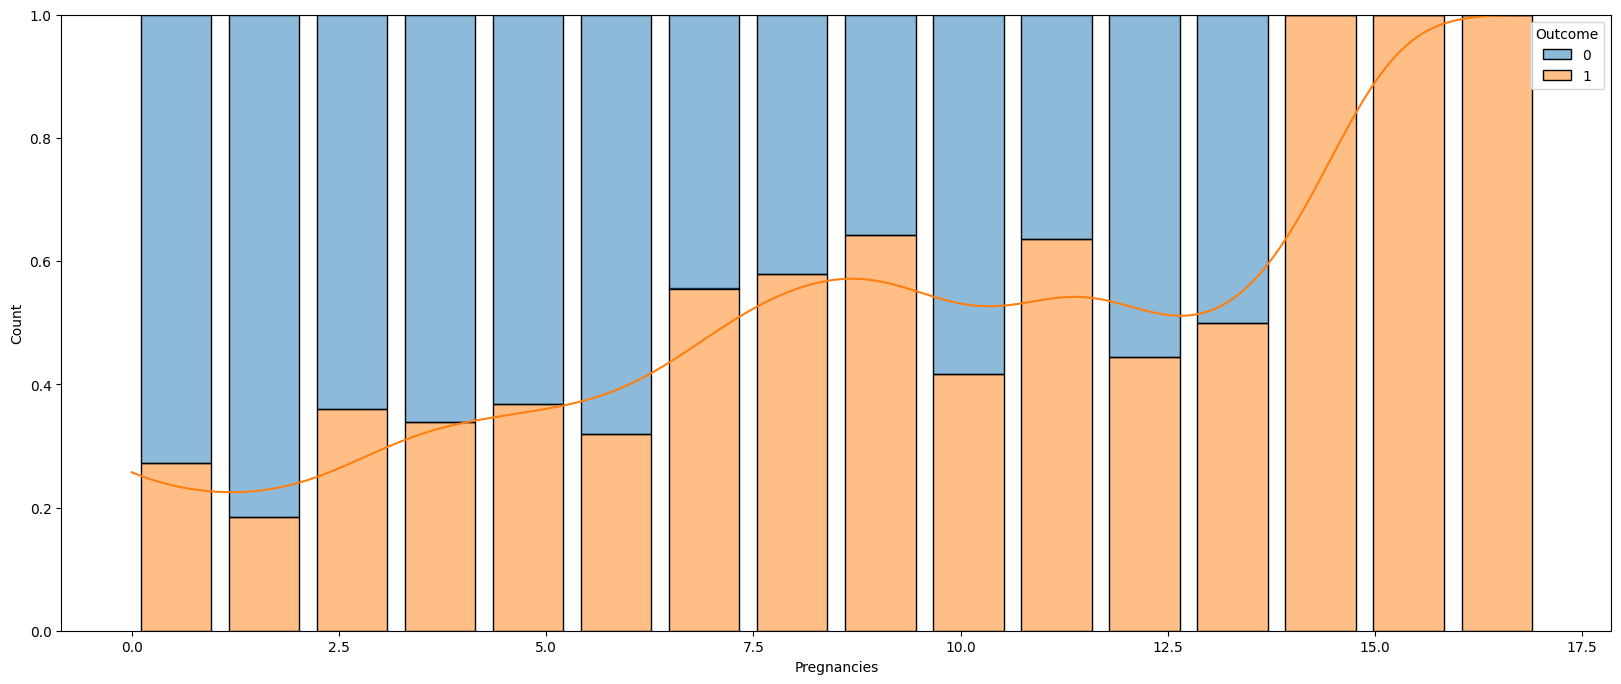

In [27]:
fig19, ax19 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="Pregnancies", hue="Outcome", shrink=0.8, multiple="fill", kde=True, ax=ax19)
plt.show()

There is some positive linear correlation of Pregnancies with Outcome.